In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 28
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.linewidth'] = 1

# Data

## Kang 2018: https://arxiv.org/abs/1807.08356

In [4]:
def Rkin_to_Rphot(Rkin):
    '''
    Rkin and Rphot in log(kpc)
    '''
    Rkin = np.atleast_1d(Rkin)
    return 2*Rkin

def lum_size_func(lum_O3):
    '''
    Ref: https://arxiv.org/abs/1807.08356
    lum_O3 in log(erg/s), return logR_out
    '''
    logRout = 0.277 * lum_O3 - 11.23247
    # logRout = k * lum_O3 + b
    # logRout_up = 0.28 * lum_O3 - 11.27 + 0.14
    # logRout_down = 0.28 * lum_O3 - 11.27 - 0.14
    # return Rkin_to_Rphot(logRout), Rkin_to_Rphot(logRout_up), Rkin_to_Rphot(logRout_down)
    return logRout

In [5]:
lum_O3 = np.linspace(40, 43.8, 100)
Rout = lum_size_func(lum_O3)

In [6]:
refdata = np.loadtxt('../photometry/code/radial_profile/lum_size_ref.csv', delimiter=',', usecols=(0,1,2))
refdata.shape
data, data_up, data_down = refdata[0::3,:], refdata[1::3,:], refdata[2::3,:]
refsizes = np.loadtxt('../photometry/code/radial_profile/kin_to_phot_size.csv', delimiter=',')
sort_refsizes = refsizes.reshape((22,2,2))

In [7]:
kin_to_phot = np.max(sort_refsizes, axis=1)
y1 = kin_to_phot[:, 0]
y2 = kin_to_phot[:, 0] + np.log10(2)
sort_index = np.argsort(kin_to_phot, axis=0)[:, 0]
sorted_kin_to_phot = kin_to_phot[sort_index]
k = (0.84-0.01)/(43.49-40.50)
b = 0.01 - k*40.50
y = k*lum_O3 + b

In [8]:
data_sorted_index = np.argsort(data[:,1])
data_sorted = data[data_sorted_index]
data_up_sorted = data_up[data_sorted_index]
data_down_sorted = data_down[data_sorted_index]

## Keel 2015

In [9]:
keels_data = np.loadtxt('../photometry/code/radial_profile/Keels.csv', delimiter=',', skiprows=1, usecols=(1,5))

In [10]:
keels_data

array([[2.0e+01, 2.9e+41],
       [7.5e+00, 2.4e+40],
       [5.0e+01, 3.5e+40],
       [0.0e+00, 3.7e+40],
       [1.3e+01, 3.8e+41],
       [3.7e+01, 3.5e+40],
       [0.0e+00, 8.3e+40]])

## Harrison 2014

In [11]:
Harrisons_data = np.loadtxt('../photometry/code/radial_profile/Harrisons.csv', delimiter=',', skiprows=1, usecols=(2,3))

## Sun 2016

In [12]:
Suns_data = np.loadtxt('../photometry/code/radial_profile/Suns.csv', delimiter=',', usecols=(0,1))

## Sun 2018

In [13]:
y_sun = -7.7+0.2*lum_O3

# Plot

/tmp/ipykernel_927821/4130501213.py:14: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(keels_data[:,1]), np.log10(keels_data[:,0]), marker='o', color='orange', label='Keel 2015', s=180)


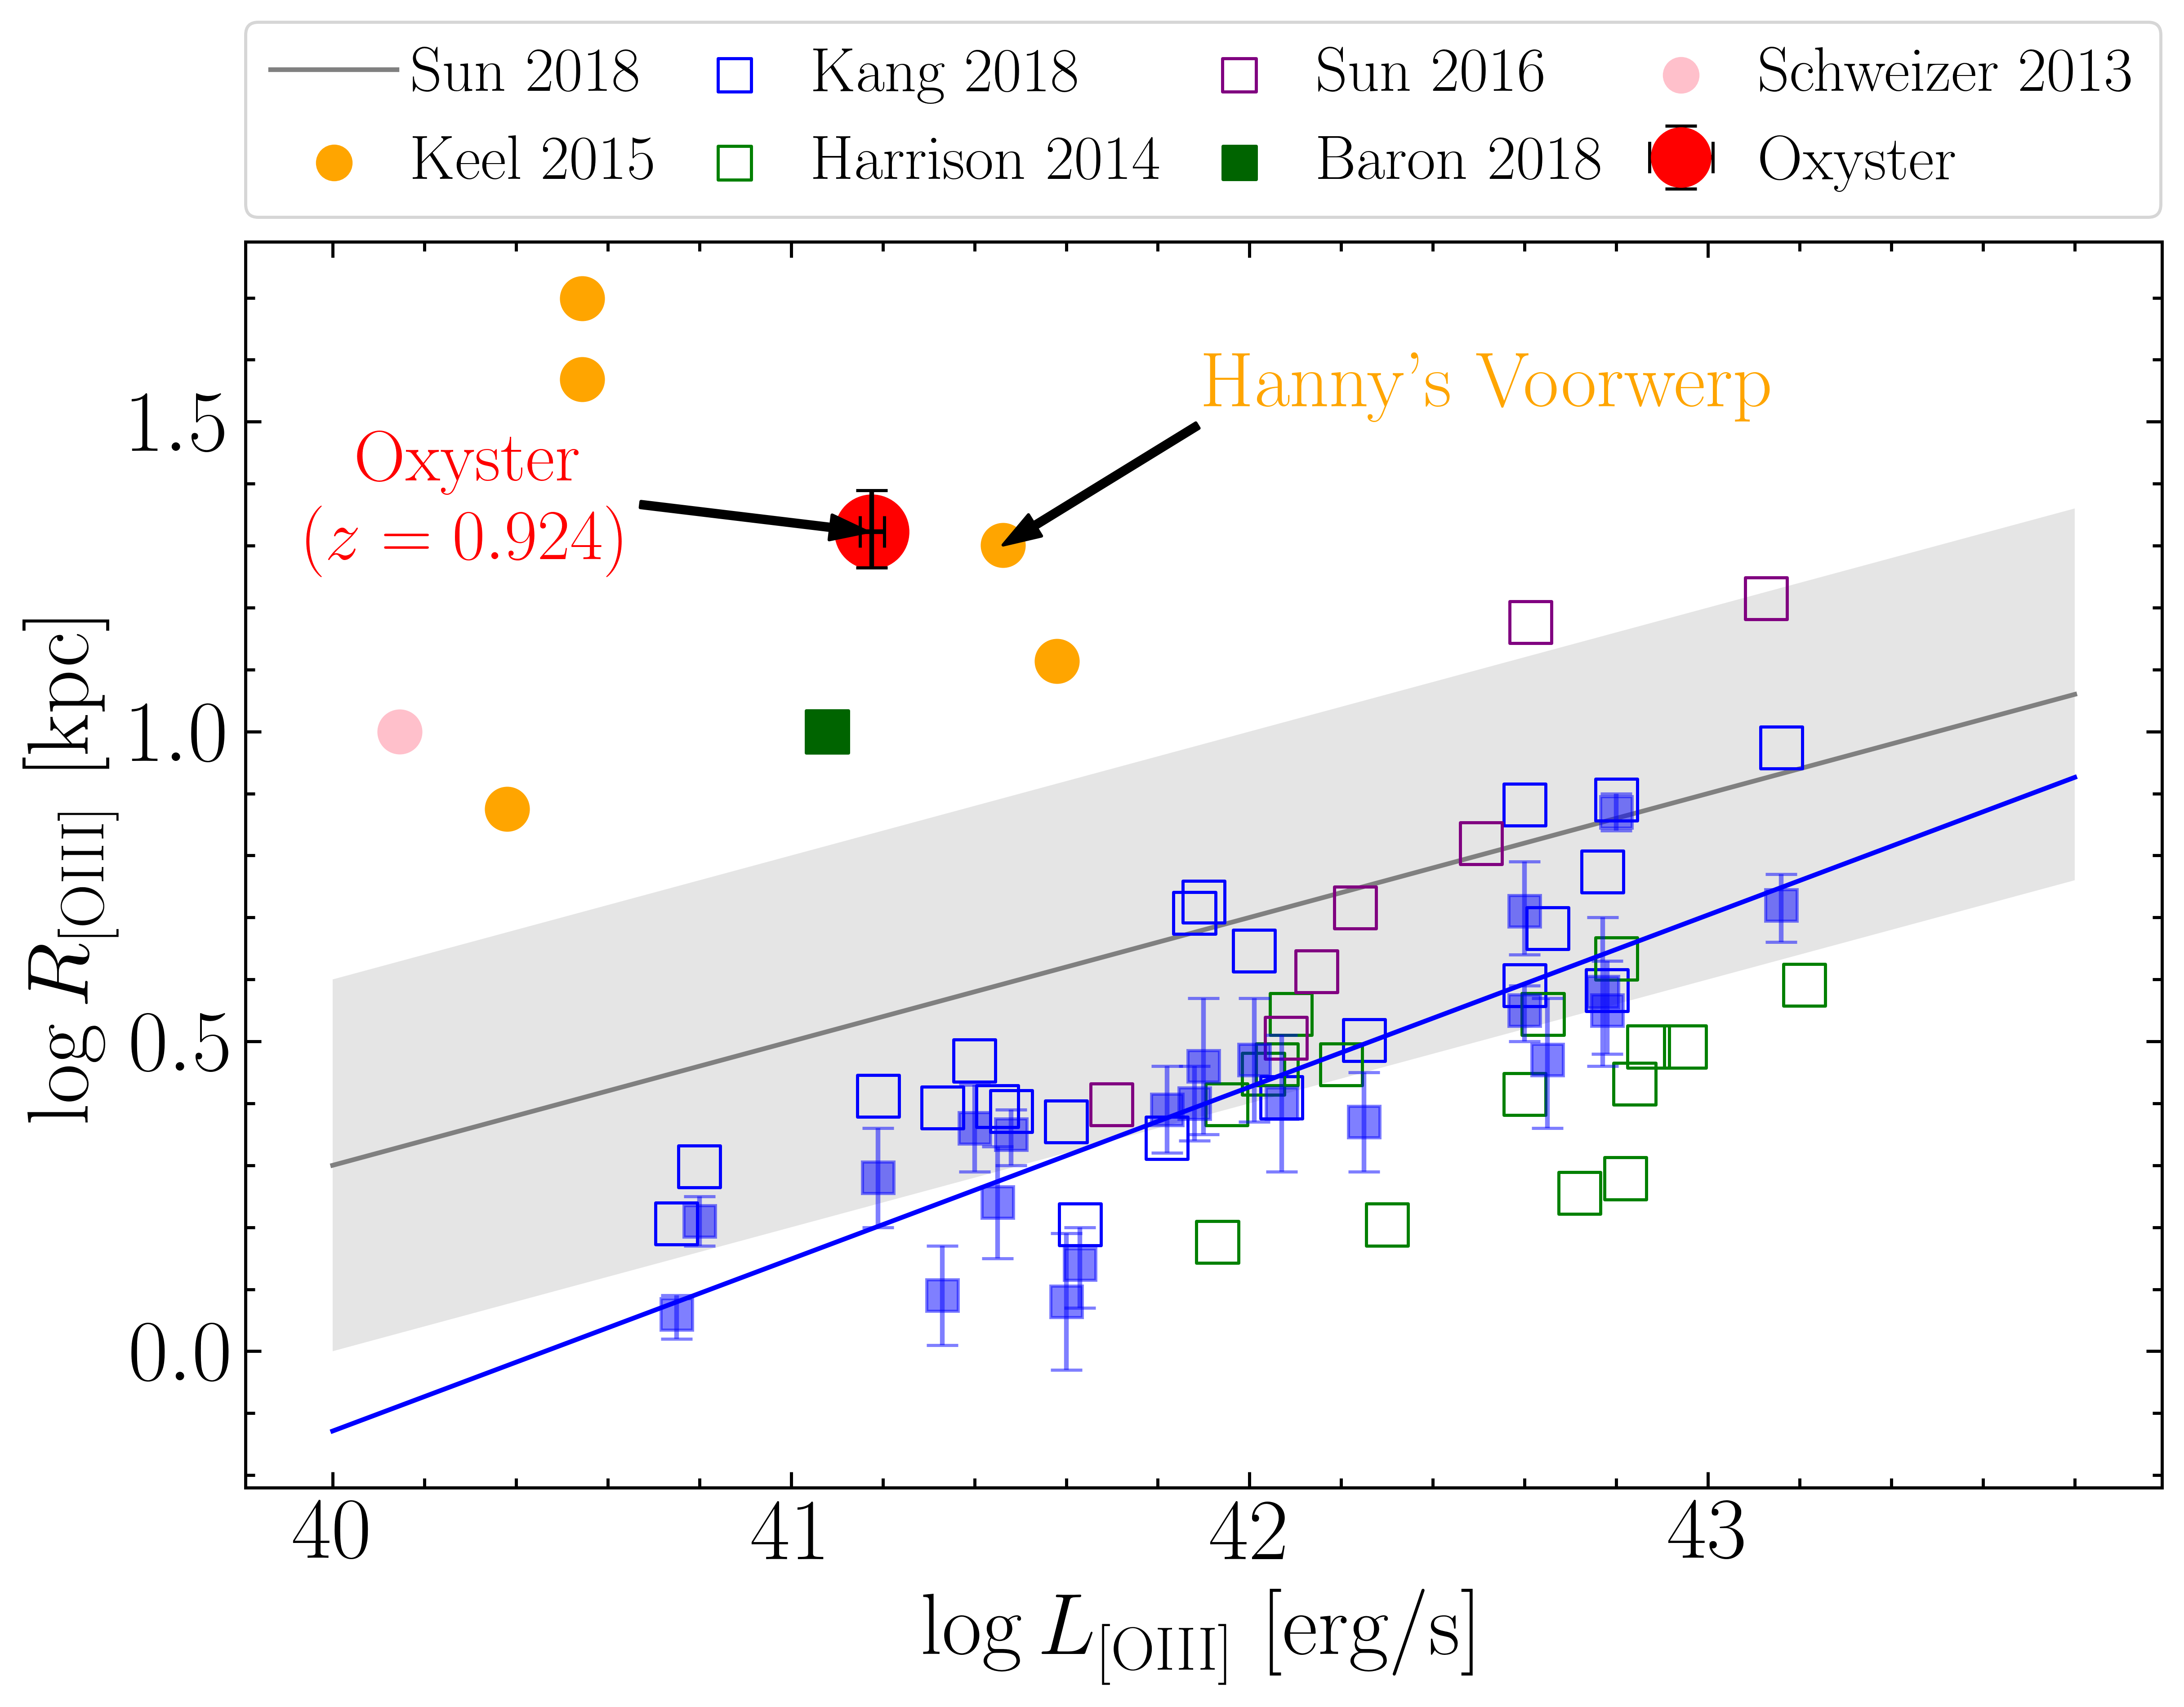

In [16]:
fig, ax = plt.subplots(figsize=(11,8))
ax.plot(lum_O3, y, 'b-')
ax.plot(lum_O3, y_sun, color='gray', linestyle='-', zorder=-1, label='Sun 2018')
ax.fill_between(lum_O3, y_sun-0.3, y_sun+0.3, alpha=0.2, color='gray', edgecolor='none')
# ax.fill_between(lum_O3, Rout_up, Rout_down, alpha=0.3)
# ax.scatter(np.log10(2.7e41), np.log10(20), s=500, c='r', marker='*', label='This work')
ax.errorbar(np.log10(1.5e41), np.log10(21), yerr=[[np.log10(21+3)-np.log10(21)], [np.log10(21)-np.log10(21-3)]], 
            xerr=[[np.log10(1.5e41+0.09e41)-np.log10(1.5e41)], [np.log10(1.5e41)-np.log10(1.5e41-0.09e41)]], 
            fmt='o', c='r', markersize=23, capsize=5, ecolor='k', barsabove=True, label='Oxyster')
# ax.errorbar(np.log10(9.24e41), np.log10(27), yerr=[[np.log10(27+3)-np.log10(27)], [np.log10(27)-np.log10(27-3)]], 
#             xerr=[[np.log10(9.24e41+0.09e41)-np.log10(9.24e41)], [np.log10(9.24e41)-np.log10(9.24e41-0.09e41)]], 
#             fmt='o', c='r', markerfacecolor='none', markersize=23, capsize=5, ecolor='k', barsabove=True)
ax.errorbar(data_sorted[:,0], data_sorted[:,1], yerr=[data_up_sorted[:,1]-data_sorted[:,1], data_sorted[:,1]-data_down_sorted[:,1]], fmt='s', c='b', capsize=5, alpha=0.5, markersize=10)
ax.scatter(np.log10(keels_data[:,1]), np.log10(keels_data[:,0]), marker='o', color='orange', label='Keel 2015', s=180)
ax.scatter(data_sorted[:,0], sorted_kin_to_phot[:,1], marker='s', facecolors='none', edgecolors='b', label='Kang 2018', s=180, zorder=1)
ax.scatter(Harrisons_data[:,1], np.log10(Harrisons_data[:,0]), marker='s', facecolors='none', edgecolors='g', label='Harrison 2014', s=180, zorder=1)
ax.scatter(np.log10(Suns_data[:,1]), np.log10(Suns_data[:,0]), marker='s', facecolors='none', edgecolors='purple', label='Sun 2016', s=180, zorder=1)
ax.scatter(np.log10(1.2e41), np.log10(10), marker='s', color='darkgreen', label='Baron 2018', s=180)
ax.scatter(np.log10(1.4e40), np.log10(10), marker='o', color='pink', label='Schweizer 2013', s=180)
ax.annotate('Hanny\'s Voorwerp',
            xy=(np.log10(2.9e+41), np.log10(2.0e+01)),  # theta, radius
            xytext=(41.9, 1.5),    # fraction, fraction
            color='orange',
            fontsize=25,
            arrowprops=dict(facecolor='k', shrink=1, width=2, headwidth=8),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
ax.annotate('Oxyster\n($z=0.924$)',
            xy=(np.log10(1.47e41), np.log10(21)),
            xytext=(40.3, 1.25),
            color='r',
            fontsize=23,
            fontweight='heavy',
            arrowprops=dict(facecolor='k', shrink=1, width=2, headwidth=8),
            horizontalalignment='center',
            verticalalignment='bottom',
            )
# ax.text(42, 1.3, '[OII] region of Oxyster', color='r', fontsize=21)
ax.set_xlabel('$\\log L_{\\rm [OIII]}$ [erg/s]')
ax.set_ylabel('$\\log R_{\\rm [OIII]}$ [kpc]')
# ax.set_xlim(40, 50)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0 - box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(0, 1.02, box.width*0.9, box.height * 0.1), loc=3,
           borderaxespad=0., ncols=4, columnspacing=0.2, fontsize=20.2, markerscale=0.8, handletextpad=0.25)
plt.savefig('lum_size.pdf', bbox_inches='tight')
plt.show()